In [ ]:
# Step 1: Install necessary libraries
# Run this in your terminal or Jupyter notebook if you haven't already
# !pip install transformers torch pandas

import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification
import torch

# Step 2: Load the dataset
# Assuming the dataset is stored in 'Reviews.csv'
df = pd.read_csv('Reviews.csv')

# Step 3: Clean the data (optional)
# For simplicity, we will only use the 'Text' column for sentiment analysis
df.dropna(subset=['Text'], inplace=True)

# Step 4: Load pre-trained BERT model and tokenizer
model_name = 'nlptown/bert-base-multilingual-uncased-sentiment'  # This model is trained for sentiment analysis
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)

# Step 5: Preprocess the text data
def preprocess(text):
    inputs = tokenizer.encode_plus(
        text,
        add_special_tokens=True,  # Adds special tokens for BERT
        max_length=512,           # Truncate or pad to max length of 512 tokens
        truncation=True,          # Truncate if longer than 512
        padding='max_length',     # Pad if shorter than 512
        return_tensors="pt"       # Return PyTorch tensors
    )
    return inputs['input_ids'], inputs['attention_mask']

# Step 6: Define a function to predict sentiment
def predict_sentiment(texts):
    input_ids_list, attention_mask_list = [], []

    # Preprocess all texts
    for text in texts:
        input_ids, attention_mask = preprocess(text)
        input_ids_list.append(input_ids)
        attention_mask_list.append(attention_mask)

    # Stack inputs into batches
    input_ids_batch = torch.cat(input_ids_list, dim=0)
    attention_mask_batch = torch.cat(attention_mask_list, dim=0)

    # Perform inference without calculating gradients
    with torch.no_grad():
        outputs = model(input_ids_batch, attention_mask=attention_mask_batch)
        logits = outputs.logits
        predictions = torch.argmax(logits, dim=1)

    return predictions

# Step 7: Sentiment mapping (from 1-5 scale to labels)
sentiment_mapping = {
    0: "very negative",
    1: "negative",
    2: "neutral",
    3: "positive",
    4: "very positive"
}

# Step 8: Apply sentiment analysis to a subset of data (for example, first 100 reviews)
# You can increase the batch size to process more reviews
batch_texts = df['Text'].iloc[:100].tolist()  # First 100 reviews
predictions = predict_sentiment(batch_texts)

# Step 9: Map the predicted values to sentiment labels
sentiments = [sentiment_mapping[pred.item()] for pred in predictions]

# Display the results
for review, sentiment in zip(batch_texts, sentiments):
    print(f"Review: {review[:100]}...")  # Print only the first 100 characters of the review for readability
    print(f"Sentiment: {sentiment}\n")

# Step 10: If you want to save the results back into the dataframe:
df['Sentiment'] = None  # Add a new column for sentiments

# Apply sentiment analysis on a larger batch (e.g., 1000 reviews)
batch_size = 1000
for start_idx in range(0, len(df), batch_size):
    batch_texts = df['Text'].iloc[start_idx:start_idx+batch_size].tolist()
    predictions = predict_sentiment(batch_texts)
    sentiments = [sentiment_mapping[pred.item()] for pred in predictions]
    df['Sentiment'].iloc[start_idx:start_idx+batch_size] = sentiments

# Save the dataframe with sentiment labels
df.to_csv('Reviews_with_Sentiments.csv', index=False)


tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

c:\Users\rassa\AppData\Local\pypoetry\Cache\virtualenvs\fraud-management-LYNVebIG-py3.11\Lib\site-packages\huggingface_hub\file_download.py:159: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\rassa\.cache\huggingface\hub\models--nlptown--bert-base-multilingual-uncased-sentiment. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

c:\Users\rassa\AppData\Local\pypoetry\Cache\virtualenvs\fraud-management-LYNVebIG-py3.11\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

Review: I have bought several of the Vitality canned dog food products and have found them all to be of good...
Sentiment: very positive

Review: Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. No...
Sentiment: very negative

Review: This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin wi...
Sentiment: very positive

Review: If you are looking for the secret ingredient in Robitussin I believe I have found it.  I got this in...
Sentiment: very positive

Review: Great taffy at a great price.  There was a wide assortment of yummy taffy.  Delivery was very quick....
Sentiment: very positive

Review: I got a wild hair for taffy and ordered this five pound bag. The taffy was all very enjoyable with m...
Sentiment: positive

Review: This saltwater taffy had great flavors and was very soft and chewy.  Each candy was individually wra...
Sentiment: very positive

Review: This taffy is so good.  It is v

C:\Users\rassa\AppData\Local\Temp\ipykernel_7460\3342828686.py:88: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Sentiment'].iloc[start_idx:start_idx+batch_size] = sentiments
C:\Users\rassa\AppData\Local\Temp\ipykernel_7460\3342828686.py

(568454, 10)


<ipython-input-1-8690ddccaa28>:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby('Score').apply(lambda x: x.sample(n=100, random_state=42)).reset_index(drop=True)
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


  0%|          | 0/75 [00:00<?, ?it/s]

Accuracy: 0.69


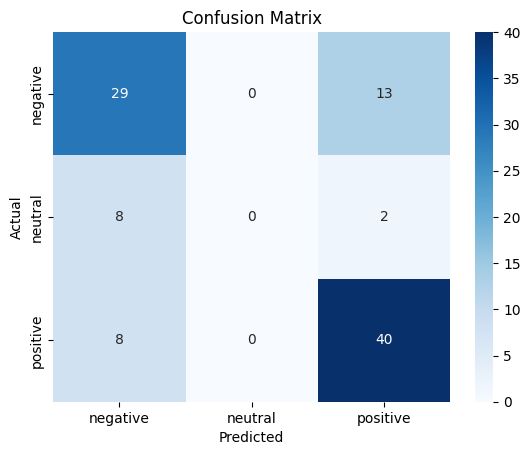

('./fine_tuned_bert_model/tokenizer_config.json',
 './fine_tuned_bert_model/special_tokens_map.json',
 './fine_tuned_bert_model/vocab.txt',
 './fine_tuned_bert_model/added_tokens.json')

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Reviews.csv')

# Clean the data - Drop any rows with missing 'Text' or 'Score'
df.dropna(subset=['Text', 'Score'], inplace=True)

# Map Score to Sentiment Labels
def map_score_to_sentiment(score):
    if score in [1, 2]:
        return "negative"
    elif score == 3:
        return "neutral"
    else:  # 4 and 5
        return "positive"

df['Sentiment'] = df['Score'].apply(map_score_to_sentiment)

# Sample 100 reviews from each Score class (1 to 5)
sampled_df = df.groupby('Score').apply(lambda x: x.sample(n=100, random_state=42)).reset_index(drop=True)

# Map sampled data to sentiment labels again (optional)
sentiment_mapping = {"negative": 0, "neutral": 1, "positive": 2}
sampled_df['SentimentLabel'] = sampled_df['Sentiment'].map(sentiment_mapping)

# Now the sampled_df contains 100 reviews from each score class (1-5)

# Split dataset into training and testing sets (80% for training, 20% for testing)
from sklearn.model_selection import train_test_split

train_texts, test_texts, train_labels, test_labels = train_test_split(
    sampled_df['Text'].tolist(),
    sampled_df['SentimentLabel'].tolist(),
    test_size=0.2,
    random_state=42
)

# Preprocessing and Fine-tuning BERT
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_scheduler
import torch
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

# Define a Dataset class
class SentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        inputs = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            truncation=True,
            padding='max_length',
            return_tensors="pt"
        )
        return {
            'input_ids': inputs['input_ids'].flatten(),
            'attention_mask': inputs['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Load the pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=3)

# Create datasets and dataloaders
max_len = 128
batch_size = 16

train_dataset = SentimentDataset(train_texts, train_labels, tokenizer, max_len)
test_dataset = SentimentDataset(test_texts, test_labels, tokenizer, max_len)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Fine-tuning BERT
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

optimizer = AdamW(model.parameters(), lr=2e-5)
num_epochs = 3

num_training_steps = num_epochs * len(train_loader)
lr_scheduler = get_scheduler(
    "linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps
)

progress_bar = tqdm(range(num_training_steps))

model.train()
for epoch in range(num_epochs):
    for batch in train_loader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss
        loss.backward()

        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()
        progress_bar.update(1)

# Model Evaluation
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for batch in test_loader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        predictions = torch.argmax(outputs.logits, dim=-1)
        all_preds.extend(predictions.cpu().numpy())
        all_labels.extend(batch['labels'].cpu().numpy())

# Calculate Accuracy
accuracy = accuracy_score(all_labels, all_preds)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(all_labels, all_preds)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["negative", "neutral", "positive"], yticklabels=["negative", "neutral", "positive"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Save the fine-tuned model (optional)
model.save_pretrained('./fine_tuned_bert_model')
tokenizer.save_pretrained('./fine_tuned_bert_model')


In [8]:
# prompt: i want to install openai version 0.28.0

!pip install openai==0.28.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 3.6 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.52.0
    Uninstalling openai-1.52.0:
      Successfully uninstalled openai-1.52.0


# here

In [6]:
import pandas as pd
import openai
import numpy as np
import time

# Load your data
df = pd.read_csv('Reviews.csv')

# Set your OpenAI API key
openai.api_key = '???'  # Replace with your actual API key

# Function to get GPT-4 based rating from review text
def get_gpt_rating(review_text):
    try:
        prompt = f"Rate the following review on a scale of 1 to 5 (5 being the best) based solely on its sentiment and content. Please respond with just a number: \n\n'{review_text}'"

        response = openai.ChatCompletion.create(
            model="gpt-4",  # Use "gpt-4" or "gpt-3.5-turbo" if you have access
            messages=[
                {"role": "user", "content": prompt}
            ],
            max_tokens=5,
            temperature=0.0,
        )

        rating_str = response['choices'][0]['message']['content'].strip()

        try:
            rating = int(rating_str)
            if rating < 1:
                rating = 1
            elif rating > 5:
                rating = 5
            return rating
        except ValueError:
            print(f"Unexpected rating response: '{rating_str}'")
            return np.nan

    except Exception as e:
        print(f"Error with GPT request: {e}")
        return np.nan

# Get the first 10 unique users
first_10_users = df['UserId'].unique()[:10]

# Prepare a list to store results
results = []

# Loop through each user
for user_id in first_10_users:
    user_reviews = df[df['UserId'] == user_id]  # Get all reviews for the user
    user_name = user_reviews['ProfileName'].iloc[0]  # Get the username (ProfileName)

    # List to store individual review ratings
    individual_ratings = []

    # Iterate through the reviews and rate each
    for _, row in user_reviews.iterrows():
        review_text = row['Text']
        rating = get_gpt_rating(review_text)
        individual_ratings.append((review_text, rating))

        # Store results for printing later
        results.append((user_id, user_name, review_text, rating))

    # Calculate overall rating for the user
    overall_rating = np.nanmean([rating for _, rating in individual_ratings])  # Average of ratings, ignoring NaN
    results.append((user_id, user_name, 'Overall Rating', overall_rating))

    # To avoid API rate limits, you can add a delay between API calls
    time.sleep(2)

# Print results in the desired format
for user_id, user_name, review, rating in results:
    if review == 'Overall Rating':
        print(f"UserId: {user_id}, UserName: {user_name}, Overall Rating: {rating:.2f}")
    else:
        print(f"UserId: {user_id}, UserName: {user_name}, Review: '{review}', Rating: {rating}")

# Optionally save to a CSV file
results_df = pd.DataFrame(results, columns=['UserId', 'ProfileName', 'Review', 'Rating'])
results_df.to_csv('user_reviews_with_ratings.csv', index=False)


UserId: A3SGXH7AUHU8GW, UserName: delmartian, Review: 'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.', Rating: 5
UserId: A3SGXH7AUHU8GW, UserName: delmartian, Overall Rating: 5.00
UserId: A1D87F6ZCVE5NK, UserName: dll pa, Review: 'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".', Rating: 2
UserId: A1D87F6ZCVE5NK, UserName: dll pa, Overall Rating: 2.00
UserId: ABXLMWJIXXAIN, UserName: Natalia Corres "Natalia Corres", Review: 'This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar